In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%load_ext numpy_html

In [4]:
%%html
<style>
table {margin-top: 16pt;}
td {font-family: Arial, Helvetica, sans-serif !important; font-weight: 600; white-space: normal !important;}
tr:nth-child(even) {background: #b0d9eb !important; color: black}
tr:nth-child(odd) {background: #8fb1bf !important; color: black}
</style>

In [5]:
df = sns.load_dataset('mpg')
df['kilometers'] = df['mpg'] * 160
df = df.drop('mpg', axis=1)
df = df.drop('name', axis=1)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,kilometers
0,8,307.0,130.0,3504,12.0,70,usa,2880.0
1,8,350.0,165.0,3693,11.5,70,usa,2400.0
2,8,318.0,150.0,3436,11.0,70,usa,2880.0
3,8,304.0,150.0,3433,12.0,70,usa,2560.0
4,8,302.0,140.0,3449,10.5,70,usa,2720.0


In [6]:
correlation = df.corr(numeric_only=True)
correlation

,cylinders,displacement,horsepower,weight,acceleration,model_year,kilometers
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.775396
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.804203
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.831741
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.420289
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.579267
kilometers,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,1.000000


<b>Acceleration does not correlate with anything much, so I guess it can be removed. Also, since model year does not correlate with other columns except kilometers, so I will remove it as well. Kilometers however anti correlae with all other columns, so I will keep it for now</b>

In [7]:
df = df.drop('model_year', axis=1)
df = df.drop('acceleration', axis=1)

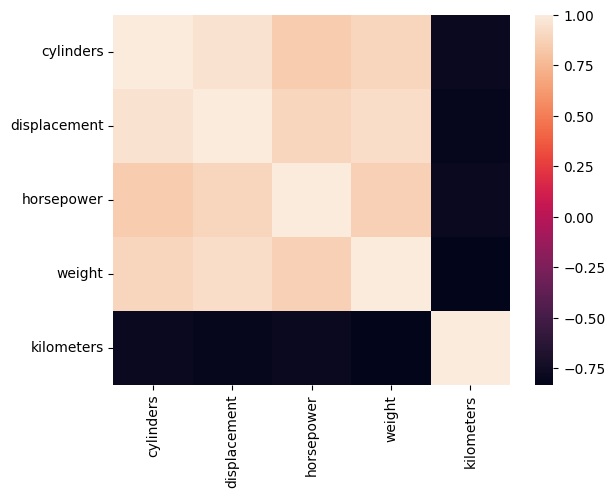

In [8]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation)
plt.show()

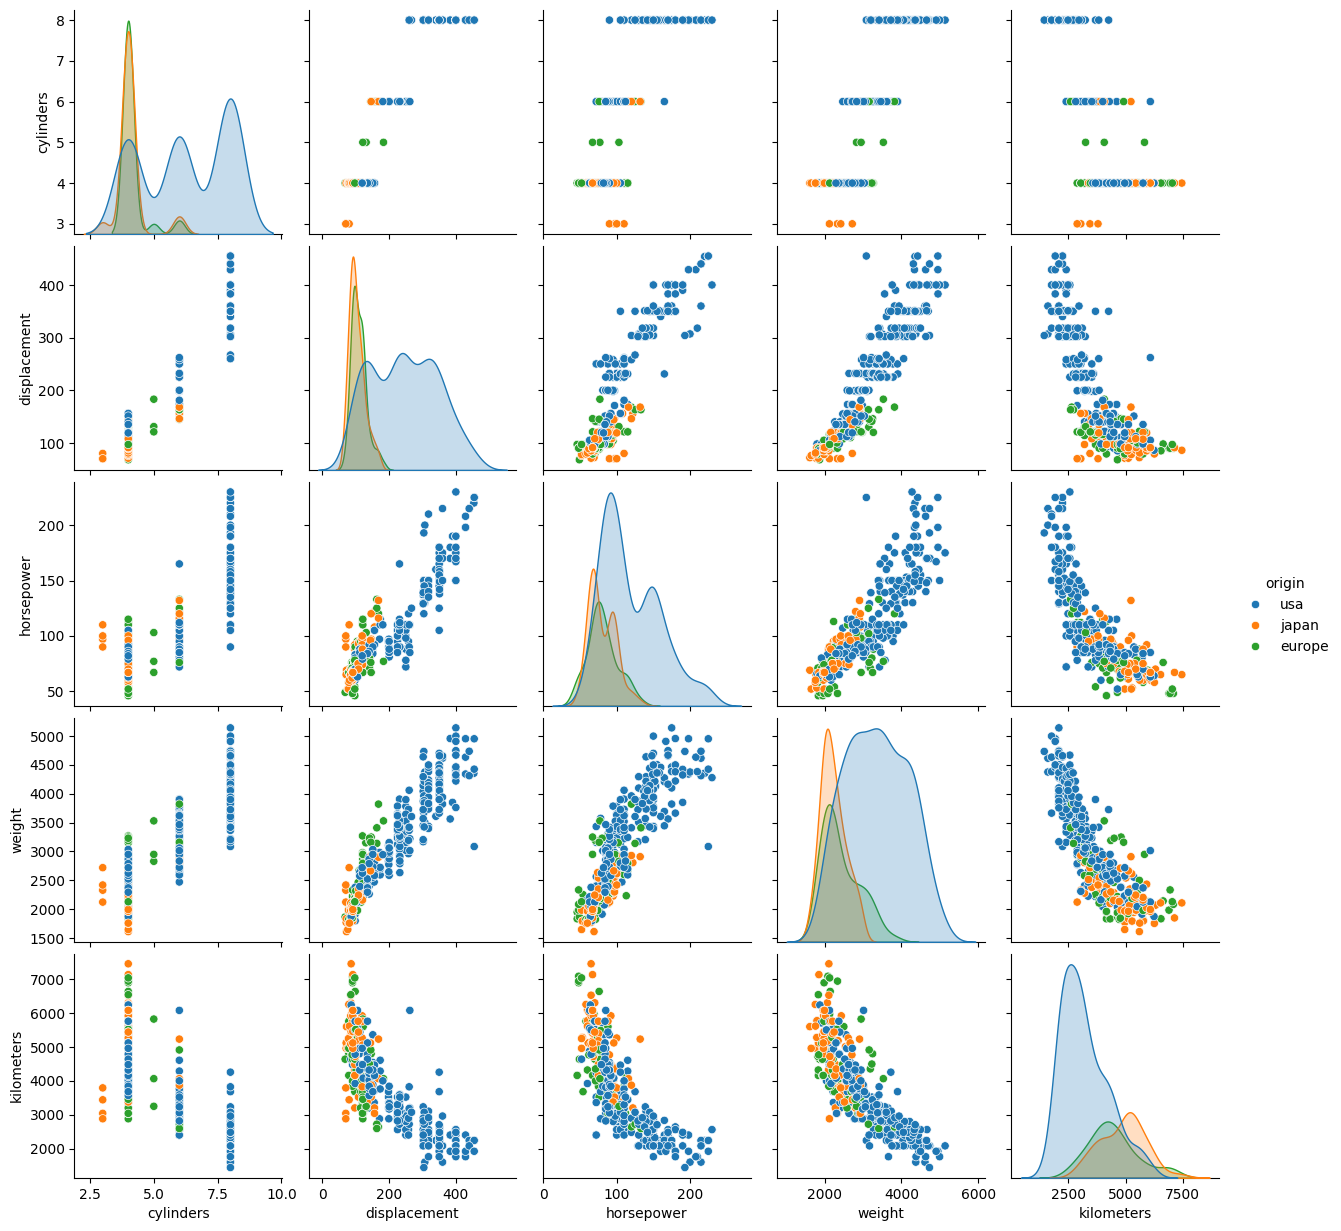

In [9]:
# Create a pair plot of the data
sns.pairplot(df, hue='origin')
plt.show()

<b>Well, obviously, USA has the biggest fuel consumption, there lots of cars, not much public transport, and heavier and more powerful cars in general.</b>

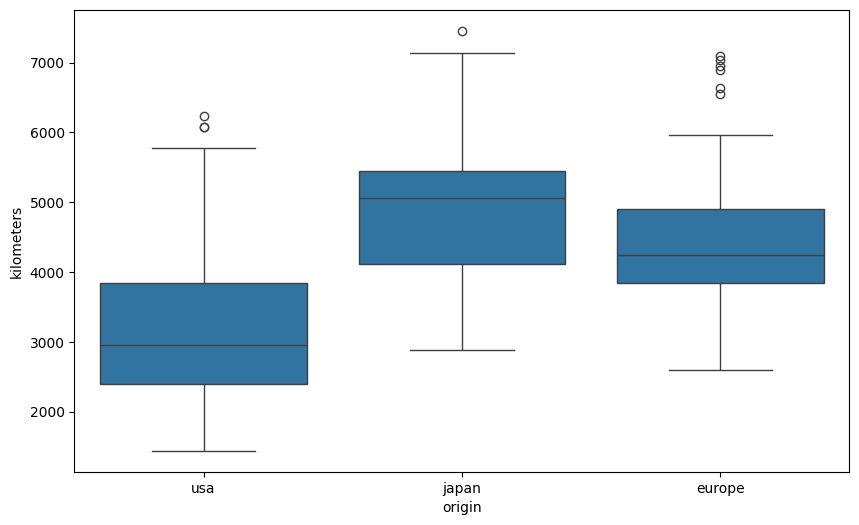

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='origin', y='kilometers')
plt.show()

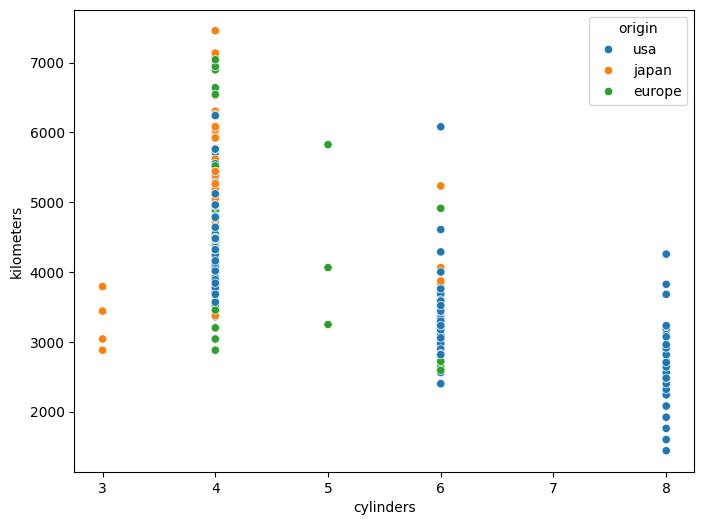

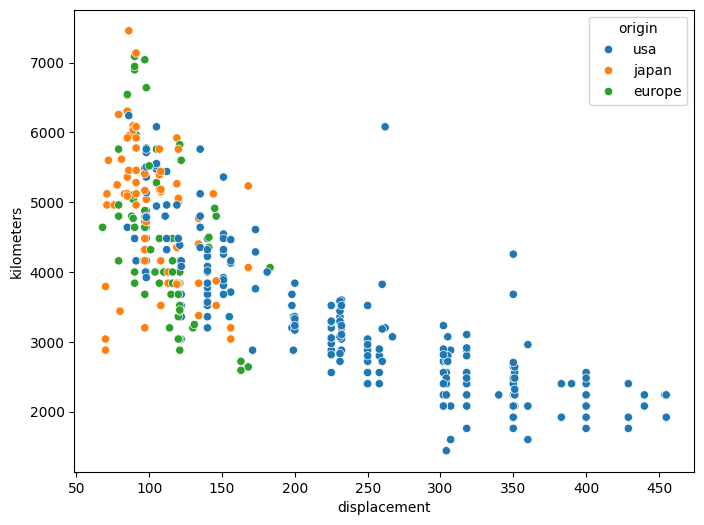

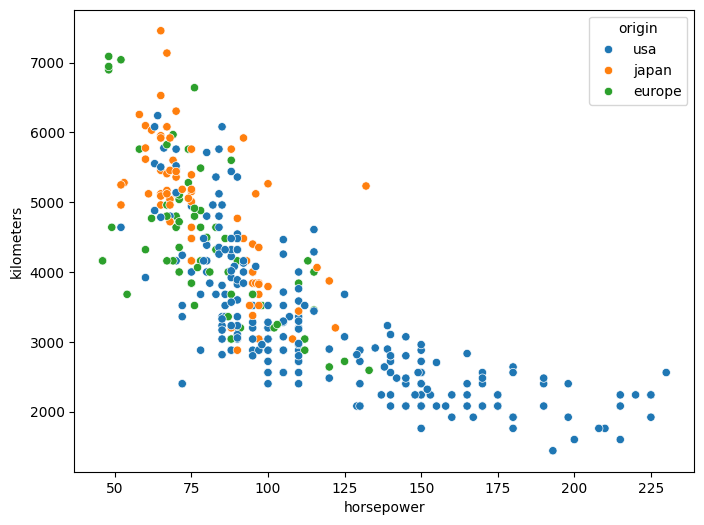

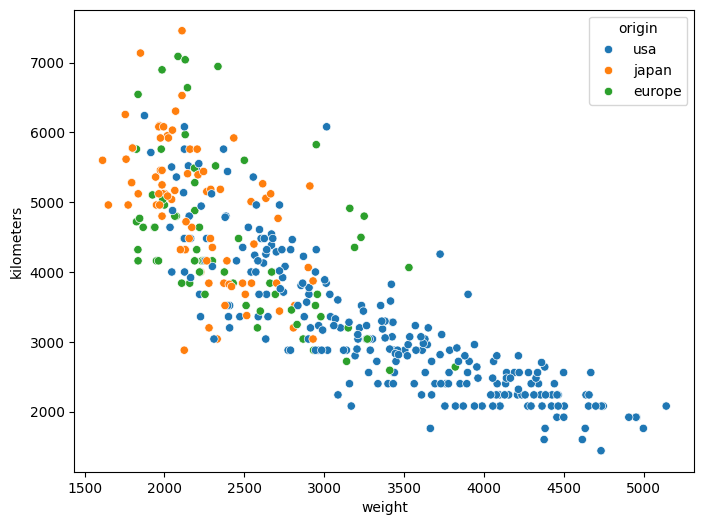

In [18]:
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='kilometers', hue='origin')
    plt.show()

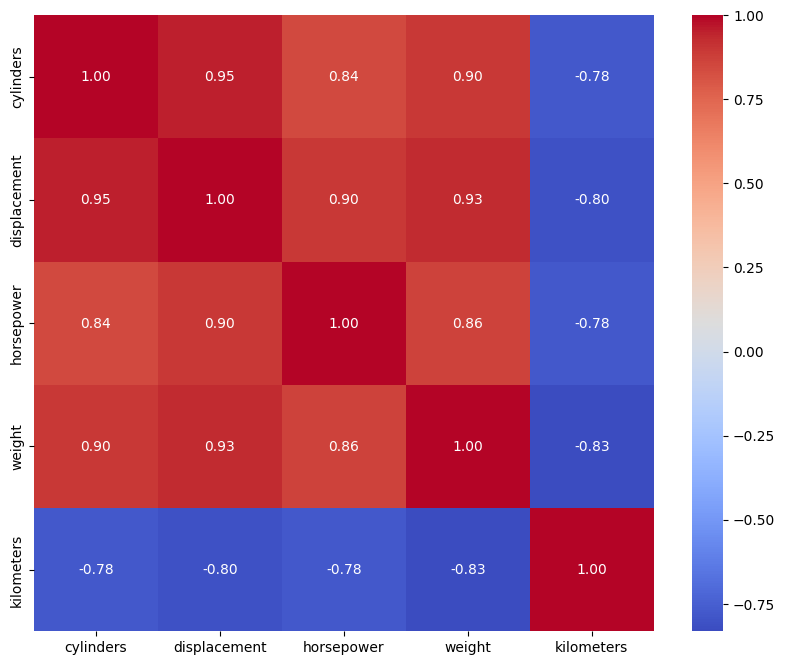

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<b>Here we can also see that cars with lower weight, horsepower and cylinders tend to have lower fuel consumption</b>